In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
from acleto.visualize.visualize import plot_query, visualize_experiments, plot_with_confidence_interval
import pandas as pd
import numpy as np
from pathlib import Path
import re

In [41]:
metric_name = "rouge2"

df = pd.DataFrame(columns=["strategy", "seed"] + [f"iter_{i}" for i in range(51)])

results_dirs = {
    "random": "results/random_600_clusters/",
    "unc_600": "results/base_al_600_clusters_rouge/",
    "unc_60": "results/base_al_60_clusters_rouge/",
}

for strategy, res_dir in results_dirs.items():
    for file_path in Path(res_dir).iterdir():
        file_name = str(file_path).split("/")[-1]
        if file_name.startswith("results"):
            new_obs = [strategy, int("".join(re.findall("\d", file_name)))] +\
            pd.read_csv(file_path)["eval_" + metric_name].values.tolist()
            df.loc[len(df)] = new_obs + [np.nan for _ in range(df.shape[1] - len(new_obs))]
df

,strategy,seed,iter_0,iter_1,iter_2,iter_3,iter_4,iter_5,iter_6,iter_7,iter_8,iter_9,iter_10,iter_11,iter_12,iter_13,iter_14,iter_15,iter_16,iter_17,iter_18,iter_19,iter_20,iter_21,iter_22,iter_23,iter_24,iter_25,iter_26,iter_27,iter_28,iter_29,iter_30,iter_31,iter_32,iter_33,iter_34,iter_35,iter_36,iter_37,iter_38,iter_39,iter_40,iter_41,iter_42,iter_43,iter_44,iter_45,iter_46,iter_47,iter_48,iter_49,iter_50
0,random,123456100,0.1408,0.1466,0.1494,0.1461,0.1497,0.1477,0.1537,0.1548,0.1544,0.1590,0.1608,0.1583,0.1559,0.1582,0.1598,0.1648,0.1419,0.1491,0.1526,0.1545,0.1502,0.1526,0.1510,0.1529,0.1589,0.1514,0.1484,0.1525,0.1524,0.1551,0.1567,0.1560,0.1562,0.1596,0.1610,0.1558,0.1576,0.1620,0.1638,0.1613,0.1570,0.1663,0.1626,0.1557,0.1658,0.1591,0.1635,0.1627,0.1602,0.1652,0.1633
1,random,23419,0.1549,0.1467,0.1534,0.1637,0.1606,0.1633,0.1602,0.1550,0.1597,0.1634,0.1624,0.1568,0.1406,0.1620,0.1400,0.1401,0.1456,0.1510,0.1439,0.1446,0.1468,0.1529,0.1489,0.1529,0.1517,0.1499,0.1474,0.1507,0.1462,0.1532,0.1582,0.1532,0.1578,0.1562,0.1571,0.1569,0.1547,0.1532,0.1595,0.1586,0.1546,0.1577,0.1604,0.1615,0.1645,0.1619,0.1656,0.1728,0.1612,0.1619,0.1596
2,random,42,0.1405,0.1435,0.1518,0.1618,0.1498,0.1580,0.1602,0.1535,0.1578,0.1560,0.1605,0.1612,0.1593,0.1559,0.1418,0.1640,0.1425,0.1482,0.1450,0.1589,0.1512,0.1509,0.1565,0.1514,0.1601,0.1602,0.1624,0.1580,0.1616,0.1572,0.1576,0.1636,0.1580,0.1567,0.1587,0.1535,0.1526,0.1617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,unc_600,42,0.1370,0.1390,0.1454,0.1517,0.1522,0.1488,0.1522,0.1566,0.1584,0.1632,0.1598,0.1610,0.1634,0.1679,0.1435,0.1522,0.1494,0.1495,0.1498,0.1531,0.1534,0.1523,0.1546,0.1499,0.1549,0.1574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,unc_600,123456,0.1369,0.1465,0.1463,0.1442,0.1493,0.1513,0.1533,0.1582,0.1403,0.1632,0.1382,0.1478,0.1508,0.1477,0.1491,0.1497,0.1549,0.1529,0.1560,0.1572,0.1600,0.1622,0.1530,0.1618,0.1522,0.1648,0.1633,0.1630,0.1612,0.1666,0.1657,0.1664,0.1622,0.1719,0.1630,0.1652,0.1671,0.1649,0.1696,0.1591,0.1642,0.1635,0.1696,0.1647,0.1615,0.1545,0.1665,0.1592,0.1635,0.1629,0.1683
5,unc_600,23419,0.1278,0.1370,0.1486,0.1494,0.1489,0.1513,0.1482,0.1500,0.1487,0.1537,0.1552,0.1576,0.1595,0.1577,0.1605,0.1603,0.1634,0.1639,0.1654,0.1639,0.1677,0.1626,0.1671,0.1636,0.1625,0.1474,0.1677,0.1656,0.1636,0.1640,0.1623,0.1647,0.1651,0.1489,0.1451,0.1620,0.1625,0.1479,0.1429,0.1488,0.1489,0.1518,0.1492,0.1443,0.1526,0.1488,0.1503,0.1497,0.1516,0.1512,0.1520
6,unc_60,42,0.1443,0.1477,0.1530,0.1555,0.1562,0.1604,0.1598,0.1645,0.1652,0.1630,0.1615,0.1630,0.1404,0.1505,0.1673,0.1509,0.1528,0.1536,0.1538,0.1548,0.1572,0.1510,0.1530,0.1512,0.1497,0.1524,0.1544,0.1528,0.1579,0.1564,0.1579,0.1590,0.1599,0.1625,0.1591,0.1625,0.1592,0.1631,0.1650,0.1596,0.1591,0.1631,0.1657,0.1651,0.1703,0.1635,0.1625,0.1647,0.1632,0.1624,0.1653
7,unc_60,123456,0.1441,0.1474,0.1529,0.1556,0.1605,0.1615,0.1626,0.1618,0.1639,0.1678,0.1580,0.1666,0.1491,0.1470,0.1640,0.1534,0.1540,0.1561,0.1542,0.1569,0.1719,0.1602,0.1513,0.1564,0.1540,0.1543,0.1577,0.1559,0.1633,0.1579,0.1631,0.1608,0.1644,0.1661,0.1670,0.1679,0.1682,0.1659,0.1625,0.1651,0.1682,0.1635,0.1676,0.1724,0.1671,0.1649,0.1667,0.1658,0.1702,0.1667,0.1667
8,unc_60,23419,0.1479,0.1440,0.1504,0.1529,0.1490,0.1505,0.1532,0.1560,0.1540,0.1504,0.1527,0.1546,0.1425,0.1602,0.1496,0.1536,0.1588,0.1487,0.1507,0.1626,0.1579,0.1551,0.1509,0.1604,0.1528,0.1485,0.1545,0.1631,0.1528,0.1532,0.1563,0.1566,0.1596,0.1603,0.1516,0.1542,0.1566,0.1570,0.1588,0.1611,0.1649,0.1598,0.1554,0.1597,0.1676,0.1593,0.1599,0.1651,0.1660,0.1553,0.1557


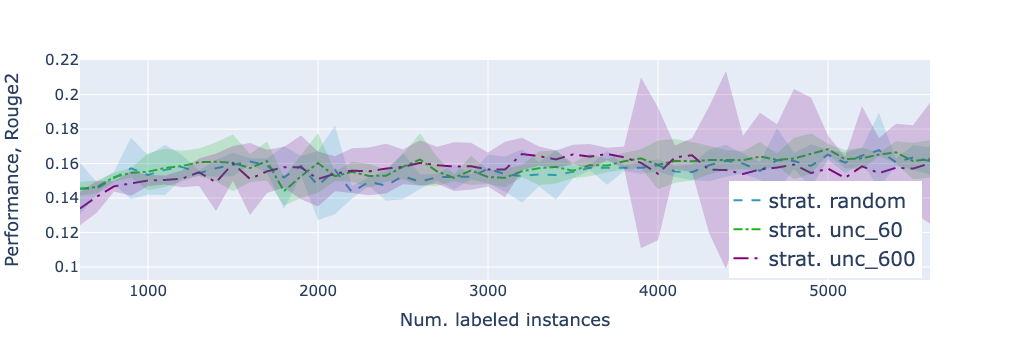

In [6]:
plot_with_confidence_interval(
    df, ["strategy"], metric_name="rouge2", task="ats", index=600 + np.arange(0, 51*100, 100)
)

In [1]:
from evaluate import load
rouge = load("rouge")

In [2]:
rouge.compute(predictions=["Ik hou van koffie"], references=["Ik vind de koffie leuk"])

{'rouge1': 0.4444444444444445,
 'rouge2': 0.0,
 'rougeL': 0.4444444444444445,
 'rougeLsum': 0.4444444444444445}